# Métodos iterativos

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import warnings

#### Observaciones


* $\texttt{np.tril}$ devuelve una copia de la matriz $A$, pero con los que estan por encima de la diagonal de la matriz hechos $0$.
* $\texttt{np.triu}$ devuelve una copia de la matriz $A$, pero con los que estan por debajo de la diagonal de la matriz hechos $0$.
* $\texttt{np.diag}$:
  - Si el input es una matriz $A$, devuelve su diagonal como un vector $v$ de una dimensión.
  - Si el input es un vector $v$ de una dimensión, construye una matriz diagonal $A$ con $v$ como diagonal.
 
Clarifico esto con un par de ejemplos:   

In [2]:
# Defino una matriz para ejemplificar
A = np.asarray([[1,2,3],[4,5,6],[7,8,9]])

In [3]:
# Me quedo con la parte inferior + diagonal de la matriz
np.tril(A)

array([[1, 0, 0],
       [4, 5, 0],
       [7, 8, 9]])

In [4]:
# Me quedo con la parte inferior de la matriz
np.tril(A,-1)

array([[0, 0, 0],
       [4, 0, 0],
       [7, 8, 0]])

In [5]:
# Me quedo con la parte superior + diagonal de la matriz
np.triu(A)

array([[1, 2, 3],
       [0, 5, 6],
       [0, 0, 9]])

In [6]:
# Me quedo con la parte superior de la matriz
np.triu(A,1)

array([[0, 2, 3],
       [0, 0, 6],
       [0, 0, 0]])

In [7]:
# Me quedo con la diagonal de la matriz
np.diag(A)

array([1, 5, 9])

In [8]:
# Me quedo con la diagonal de la matriz como matriz
np.diag(np.diag(A))

array([[1, 0, 0],
       [0, 5, 0],
       [0, 0, 9]])

In [9]:
# Me quedo con la inversa de la diagonal como matriz
np.diag(1/np.diag(A))

array([[1.        , 0.        , 0.        ],
       [0.        , 0.2       , 0.        ],
       [0.        , 0.        , 0.11111111]])

## Método de Jacobi

En el método de Jacobi, escribimos a la matriz $A$ como

$$A=D+R$$

donde $D$ es diagonal y $R$ es la suma de una matriz triangular inferior $L$ y una matriz triangular superior $U$, es decir $R=L+U$. Para resolver $Ax=b$, tenemos:

$$(D+R)x=b$$
$$Dx + Rx = b$$

y por lo tanto,

$$x = D^{-1} (b-Rx)$$

Si fuera que $a_{ii}=0$ para todo $i$, entonces la regla iterativa del método de Jacobi puede ser definida como:

$$x^{(k+1)} = D^{-1} \left(b-Rx^{(k)}\right)$$

o de otra manera:

$$x_i^{(k+1)} = \frac{1}{a_{ii}} \left(b_i - \sum_{j\neq i} a_{ij}x_j^{(k)} \right) \, \text{, para todo } i$$

In [10]:
def Jacobi(A, b, tol = 1e-10, tope_iteraciones = 1000):
    # Chequeamos que las dimensiones sean apropiadas
    if A.shape[0] != A.shape[1]:
        raise ValueError("La matriz A no es cuadrada")
    if A.shape[1] != b.shape[0]:
        raise ValueError("Las dimensiones del sistema no cuadran")

    # Definimos a n como la dimensión de la matriz
    n = A.shape[0]

    # Inicializamos el vector respuesta
    x = np.zeros(n)
    
    k = 0
    # Iteramos mientras no superemos el límite de iteraciones
    while k < tope_iteraciones:
        # Creamos una copia del vector x
        x_nuevo = np.copy(x)

        # Actualizamos a x_nuevo, que es x_i ^(k+1) en nuestra notación de arriba, siguiendo al método de Jacobi
        for i in range(n):
            suma = sum(A[i][j] * x[j] for j in range(n) if j != i)  
            x_nuevo[i] = (b[i] - suma) / A[i][i]
        
        # Si el método se estacionó, es decir, la diferencia entre el x_nuevo y el antiguo es menor que cierta tolerancia,
        # directamente devolvemos el x_nuevo
        if np.linalg.norm(x_nuevo - x, ord = np.inf) < tol:
            return x_nuevo

        # Actualizamos el valor de x para la siguiente iteración, y aumentamos en 1 el número de iteraciones
        x = x_nuevo
        k += 1

    # Si terminamos el while sin que el método se estacione, hacemos que la función devuelva un mensaje de advertencia.
    warnings.warn(f"Advertencia: se alcanzó el tope de {tope_iteraciones} iteraciones sin converger.")

#### Ejemplo 1 - Criterio EDD

Tomemos la matriz estrictamente diagonal dominante:

$$
A
=
\begin{pmatrix}
10 & 2 & 1\\
1 & 10 & 2\\
2 & 3 & 10\\
\end{pmatrix}
$$

que por lo probado teóricamente debería converger.

In [11]:
# Definimos una matriz y un vector para probar la función

A = np.asarray([[10,2,1],[1,10,2],[2,3,10]])
b = np.array([7,8,9])

In [12]:
# Vemos la solución que nos da Python con numpy
np.linalg.solve(A,b)

array([0.51372119, 0.62678375, 0.60922064])

In [13]:
# Vemos la solución que nos da nuestro método de Jacobi
Jacobi(A,b)

array([0.51372119, 0.62678375, 0.60922064])

Vemos, que como teníamos probado teóricamente, el método parece converger a una buena solución

#### Ejemplo 2 - Método no convergiendo

Si tomamos la matriz
$$
A
=
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 10 \\
\end{pmatrix}
$$

observaremos que al no cumplir ninguna de las condiciones de Jacobi, podría no converger a una buena solución.

In [14]:
# Definimos otra matriz para probar cuando Jacobi no converge

A = np.asarray([[1,2,3],[4,5,6],[7,8,10]])
b = np.array([7,8,9])

In [15]:
# Vemos la solución que nos da nuestro método de Jacobi
Jacobi(A,b)

C:\Users\Fausto\AppData\Local\Temp\ipykernel_14240\2863069600.py:22: RuntimeWarning: overflow encountered in scalar add
  suma = sum(A[i][j] * x[j] for j in range(n) if j != i)
C:\Users\Fausto\AppData\Local\Temp\ipykernel_14240\2863069600.py:22: RuntimeWarning: overflow encountered in scalar multiply
  suma = sum(A[i][j] * x[j] for j in range(n) if j != i)
C:\Users\Fausto\AppData\Local\Temp\ipykernel_14240\2863069600.py:35: UserWarning: Advertencia: se alcanzó el tope de 1000 iteraciones sin converger.
  warnings.warn(f"Advertencia: se alcanzó el tope de {tope_iteraciones} iteraciones sin converger.")


Obtenemos la advertencia de que llegamos al tope de iteraciones que habíamos planteado para la función, pero, ¿y si forzamos más iteraciones?

In [16]:
# Vemos la solución que nos da nuestro método de Jacobi forzando más iteraciones
Jacobi(A,b,10000)

array([7. , 1.6, 0.9])

In [17]:
np.linalg.solve(A,b)

array([-6.33333333e+00,  6.66666667e+00,  1.77635684e-15])

Vemos que las soluciones en este caso son significativamente distintas. Esto nos confirma que para la utilización de métodos iterativos deberemos ser cautelosos sobre las condiciones que hay que imponerle a la matriz para que converjan, y que el estudio de la convergencia de los métodos es muy importante.

## Método de Gauss-Seidel

En el método de Gauss-Seidel, escribimos a la matriz $A$ como

$$A= R + U$$

donde $U$ es triangular superior con ceros en la diagonal y $R$ es la suma de una matriz triangular inferior $L$ y la matrix diagonal $D$, es decir $R=L+D$. Para resolver $Ax=b$, tenemos:

$$(R+U)x=b$$
$$Rx + Ux = b$$

y por lo tanto,

$$x = R^{-1} (b-Ux)$$

Si fuera que $a_{ii}=0$ para todo $i$, entonces la regla iterativa del método de Gauss-Seidel puede ser definida como:

$$x^{(k+1)} = (L+D)^{-1} \left(b-Ux^{(k)}\right)$$

o de otra manera:

$$x_i^{(k+1)} = \frac{1}{a_{ii}} \left(b_i - \sum_{j = i+1}^{n} a_{ij}x_j^{(k)} - \sum_{j=1}^{i-1}a_{ij}x_{j}^{(k+1)} \right) \, \text{, para todo } i$$

In [18]:
def Gauss_Seidel(A, b, tol = 1e-10, tope_iteraciones = 1000):
    # Chequeamos que las dimensiones sean apropiadas
    if A.shape[0] != A.shape[1]:
        raise ValueError("La matriz A no es cuadrada")
    if A.shape[1] != b.shape[0]:
        raise ValueError("Las dimensiones del sistema no cuadran")

    # Definimos a n como la dimensión de la matriz
    n = A.shape[0]

    # Inicializamos el vector respuesta
    x = np.zeros(n)

    k = 0
    # Iteramos mientras no superemos el límite de iteraciones
    while k < tope_iteraciones:
        # Creamos una copia del vector x
        x_nuevo = np.copy(x)

        # Actualizamos a x_nuevo, que es x_i ^(k+1) en nuestra notación de arriba, siguiendo al método de Gauss-Seidel
        for i in range(n):
            suma = sum(A[i][j] * x_nuevo[j] for j in range(i)) + sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_nuevo[i] = (b[i] - suma) / A[i][i]
            
        # Si el método se estacionó, es decir, la diferencia entre el x_nuevo y el antiguo es menor que cierta tolerancia,
        # directamente devolvemos el x_nuevo
        if np.linalg.norm(x_nuevo - x, ord = np.inf) < tol:
            return x_nuevo

        # Actualizamos el valor de x para la siguiente iteración, y aumentamos en 1 el número de iteraciones
        x = x_nuevo
        k += 1
        
    # Si terminamos el while sin que el método se estacione, hacemos que la función devuelva un mensaje de advertencia.    
    warnings.warn(f"Advertencia: se alcanzó el tope de {tope_iteraciones} iteraciones sin converger.")

#### Ejemplo 1 - Criterio Hermitiana y Definida Positiva

Tomemos la matriz
$$
A
=
\begin{pmatrix}
0.3 & 0.1 & 0.2 \\
0.1 & 0.4 & 0.1 \\
0.2 & 0.1 & 0.3
\end{pmatrix}
$$
que, como veremos, es hermitiana y definida positiva, por lo que debería converger el método de Gauss-Seidel.

In [19]:
# Definimos otra matriz y otro vector para probar la función

A = np.asarray([[0.3,0.1,0.2],[0.1,0.4,0.1],[0.2,0.1,0.3]])
b = np.array([7,8,9])

In [20]:
# Aseveramos que la matriz es hermitiana
assert np.allclose(A.conj().T, A)
# Aseveramos que la matriz es definida positiva
assert np.all(np.linalg.eigvals(A)>0)

In [21]:
# Vemos la solución que nos da Python con numpy
np.linalg.solve(A,b)

array([ 3.33333333, 13.33333333, 23.33333333])

In [22]:
# Vemos la solución que nos da nuestro método de Jacobi
Gauss_Seidel(A,b)

array([ 3.33333333, 13.33333333, 23.33333333])

Observamos, entonces, el comportamiento esperado.

## Método de Residuo Generalizado Mínimo (GMRES)

In [23]:
### Ver si lo podemos implementar

# Ejemplo práctico

Vamos a aplicar estos métodos al problema de una imagen desenfocada

In [24]:
import funciones
import ejemplos

In [25]:
# Elegimos parámetros para los ejemplos
propagacion = [10, 10]
tamaño = 64
dimensiones = (tamaño, tamaño)
pixeles = dimensiones[0] * dimensiones[1]

Mostramos ahora el vector $\mathbf x_{\rm true}$

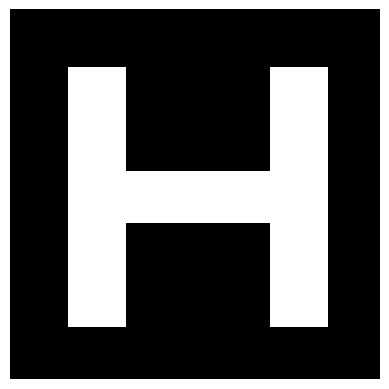

In [26]:
# Mostramos nuestro vector x_true con forma de H
x_true = ejemplos.construir_x_true()
funciones.guardar_vector(x_true, dimensiones, 'images/x_true.png')

Mostramos también el operador de difuminación, dado por la matriz $\mathbf A$, de la cual mostramos una de sus columnas

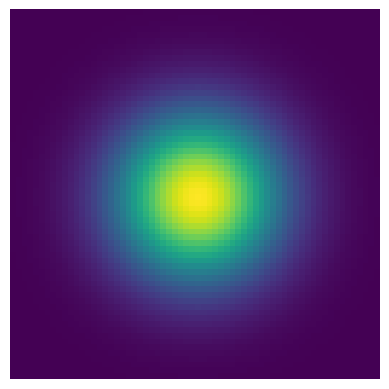

In [27]:
A = ejemplos.construir_A(propagacion, dimensiones)
plt.imshow(funciones.im(A[:, int(dimensiones[0]**2/2 + dimensiones[1]/2)], dimensiones))
plt.axis('off')
plt.show()

## Ejemplo del funcionamiento de la matriz de desenfoque $\mathbf A$ 

Para mostrar cómo funciona el operador de desenfoque, se lo aplicamos a una imagen con un solo pixel iluminado en el centro, llamemosla $\mathbf y_{\rm pixel}$.

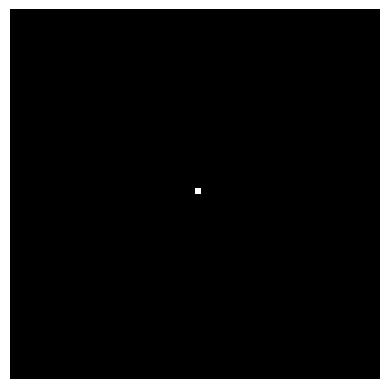

In [28]:
# Creamos un vector lleno de ceros y con uno representando el pixel del medio
y_pixel = np.zeros(pixeles)
y_pixel[2016] = 1
funciones.mostrar_vector(y_pixel, dimensiones)

Veamos entonces, como queda el pixel desenfocado (i.e. $\mathbf {A y_{\rm pixel}}$)

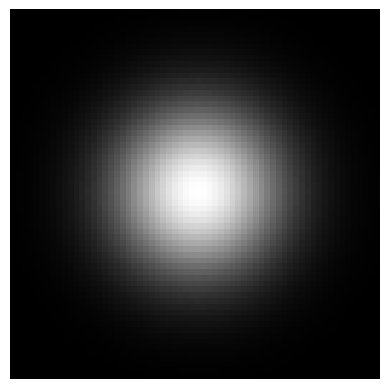

In [29]:
funciones.mostrar_vector(A.dot(y_pixel), dimensiones)

## Construcción del problema

Volviendo a nuestro problema, en la vida real, lo que vamos a tener como dato será un $\mathbf b$ ya desenfocado, y querremos tener la capacidad de reconstruir nuestra imagen original $\mathbf x_{\rm true}$. Pongámosnos entonces en ese caso hipótetico, obteniendo el $\mathbf b_{\rm true}$ de nuestra H que usamos como imagen, la $\mathbf x_{\rm true}$ de nuestro ejemplo. 

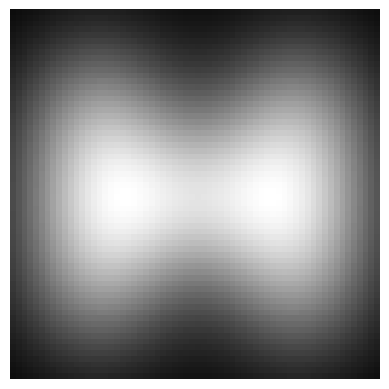

In [30]:
b_true = A @ x_true
funciones.mostrar_vector(b_true, dimensiones)

### Ruido

En la vida real, también se agregan aún más complicaciones: no conocemos una versión fidedigna de $\mathbf b_{\rm true}$, si no que por lo general esta viene trastocada por un ruido, el cual nosotros vamos a agregar a nuestro ejemplo artificial usando la función auxiliar $\texttt{agregar\_ruido}$ de el archivo de funciones auxiliares $\texttt{funciones.py}$

Para ello, tenemos varios ruidos distintos para agregar, que vamos a ir mostrando:

#### Ruido Gaussiano

Así quedaría la imagen luego de aplicarle un ruido gaussiano:

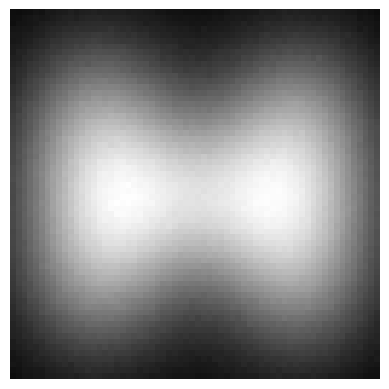

In [31]:
b_noise = funciones.agregar_ruido(b_true, opcion = "Gaussiano")
funciones.mostrar_vector(b_noise, dimensiones)

#### Ruido Poisson

Así quedaría la imagen con un ruido con una distribución de Poisson:

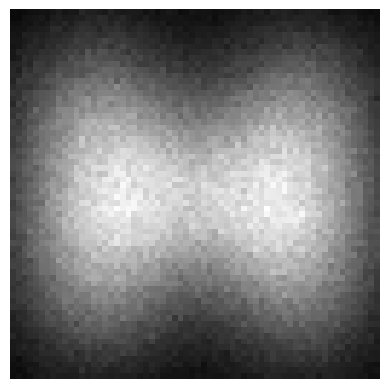

In [32]:
funciones.mostrar_vector(funciones.agregar_ruido(b_true, opcion = "Poisson"), dimensiones)

#### Ruido Laplace

Así quedaría la imagen al aplicarle un ruido dado por una distribución de Laplace:

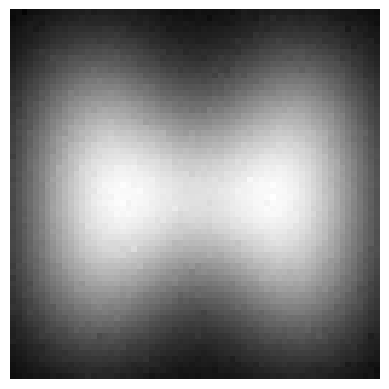

In [33]:
funciones.mostrar_vector(funciones.agregar_ruido(b_true, opcion = "Laplace"), dimensiones)

#### Ruido Salt & Pepper

Otro tipo de ruido: el Salt & Pepper, que ocurre en muchas imagenes, cubriendolas de manera dispersa con pixeles negros y blancos

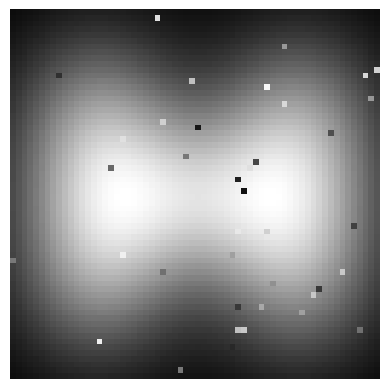

In [34]:
funciones.mostrar_vector(funciones.agregar_ruido(b_true, opcion = "saltpepper"), dimensiones)

## Resolución del problema

En lo que sigue, una vez ya charlado todo el tema de la difuminación y el inevitable ruido, vamos a trabajar con nuestro vector $\mathbf b_{\rm noise}$, generado con ruido Gaussiano, intentando reconstruir, a partir de él, una aproximación lo más buena que podamos de $\mathbf x_{\rm true}$. Por supuesto que, siempre debemos recordar que la gracia de esto es que en la vida real nunca vamos a conocer con precisión qué ruido sufrió la imagen, con lo cual el problema toma una dificultad distinta, y debemos recurrir a $\textit{métodos de regularización}$, que es el interés pricipal de este notebook

### ¿Por qué reconstruir sin regularizar es una mala idea?

La solución más ingenua a este problema sería simplemente resolver el sistema $\mathbf{Ax = \mathbf b}$ de una forma directa, probemos eso:

In [35]:
# Obtenemos la solución naive
x_naive = np.linalg.solve(A,b_noise)

Comparemos la imagen que obtuvimos con la original:

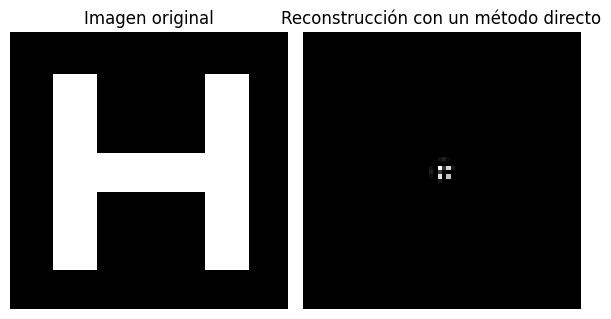

In [36]:
# Hacemos subplots para hacer 2 gráficos en uno
plt.figure(figsize=(6, 4))

# Graficamos la imagen original
plt.subplot(1, 2, 1)
imagen_true = funciones.im(x_true, dimensiones)
plt.imshow(imagen_true, vmin=0, vmax=np.max(imagen_true), cmap='gray')
plt.title("Imagen original")
plt.axis('off')

# Graficamos la reconstrucción naive
plt.subplot(1, 2, 2)
imagen_naive = funciones.im(x_naive, dimensiones)
plt.imshow(imagen_naive, vmin=0, vmax=np.max(imagen_naive), cmap='gray')
plt.title("Reconstrucción con un método directo")
plt.axis('off')

# Mostramos
plt.tight_layout()
plt.show()

Podemos observar que la performance del método directo es, entonces, paupérrima, lo cual nos lleva a pensar maenras de solucionar este problema.

### Controlar las iteraciones de GMRES

Un enfoque con el que se puede tratar el problema del mal condicionamiento es utilizar un método iterativo, como puede ser GMRES, parándolo antes de que el ruido contamine a la solución.

In [59]:
# Definimos una reversión de GMRES en la cual controlamos el ruido
def gmres_con_parada(A, b_noise, tol=1e-3, max_iter=50):
    # Definimos unas variables para ir registrando los residuos
    residuo_anterior = np.inf
    residuos = []

    # Definimos otra para ir llevando la aproximación actual de la solución en cada iteración
    x_gmres_con_parada = None

    # Probamos GMRES con k iteraciones, para k entre 1 y la cantidad de iteraciones máxima
    for k in range(1, max_iter + 1):
        # Obtenemos la solución con k iteraciones de GMRES
        x_gmres_con_parada, _ = sp.sparse.linalg.gmres(A, b_noise, maxiter=k, rtol=1e-10, restart=k)

        # Calculamos el residuo y lo agregamos a la lista
        residuo_actual = np.linalg.norm(b_noise - A @ x_gmres_con_parada)
        residuos.append(residuo_actual)

        # Si el residuo no varió mucho entre iteración e iteración, frenamos el algoritmo y devolvemos esa respuesta
        if residuo_anterior - residuo_actual < tol:
            print(f"Criterio de saturación alcanzado en iteración {k}.")
            break

        # Actualizamos el residuo
        residuo_anterior = residuo_actual

    return x_gmres_con_parada, residuos

# Ejecutar GMRES adaptativo
x_gmres_con_parada, residuos = gmres_con_parada(A, b_noise)

Criterio de saturación alcanzado en iteración 5.


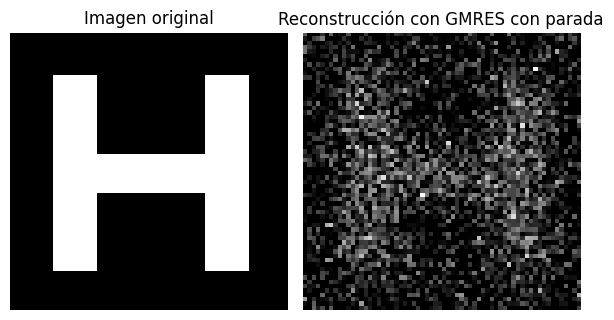

In [60]:
# Hacemos subplots para hacer 2 gráficos en uno
plt.figure(figsize=(6, 4))

# Graficamos la imagen original
plt.subplot(1, 2, 1)
plt.imshow(imagen_true, vmin=0, vmax=np.max(imagen_true), cmap='gray')
plt.title("Imagen original")
plt.axis('off')

# Graficamos la reconstrucción naive
plt.subplot(1, 2, 2)
imagen_gmres_con_parada = funciones.im(x_gmres_con_parada, dimensiones)
plt.imshow(imagen_gmres_con_parada, vmin=0, vmax=np.max(imagen_gmres_con_parada), cmap='gray')
plt.title("Reconstrucción con GMRES con parada")
plt.axis('off')

# Mostramos
plt.tight_layout()
plt.show()

Observamos una performance significativamente mejor a la ingenua, pero aún bastante insatisfactoria. Algo positivo en este caso es que casi podemos distinguir formas: la H se empieza a vislumbrar

### Regularización de Tikhonov

Otro posible enfoque es afrontar el problema haciendo primero una regularización de Tikhonov, esto es, pasar de querer resolver el problema 
$$ \mathbf{Ax = b}\,,$$

a intentar resolver

$$\min_{\mathbf x} \|\mathbf{Ax-b}\|_2^2 + \lambda^2 \|\mathbf{x}\|_2^2\,,$$

donde $\lambda > 0$ es un hiperparámetro llamado "de regularización", que ayuda a mantener $\|x\|_2^2$ pequeño, lo cual nos interesa para tener buenas soluciones.

Se puede demostrar que resolver ese problema de minimización es equivalente a resolver el sistema

$$(\mathbf{A}^T \mathbf{A} + \lambda I) \mathbf{x} = \mathbf{A}^T \mathbf{b}\,,$$

lo cual podemos hacer utilizando GMRES.

In [71]:
# Elegimos un lambda arbitrario y ploteo la solución
lamb = 1/16

# Resolvemos con GMRES
A_reg = A.T @ A + lamb * np.eye(A.shape[0])
b_reg = A.T @ b_noise
x_reg, _ = sp.sparse.linalg.gmres(A_reg, b_reg)

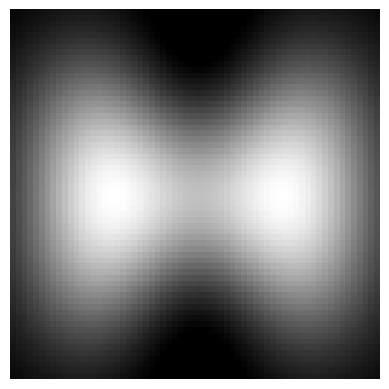

In [69]:
funciones.mostrar_vector(x_reg, dimensiones)

Podemos observar una mejora, pero aún así, el $\lambda$ que elegimos fue totalmente arbitrario, con lo cual deberíamos utilizar (sin entrar demasiado más en detalle en esto, pero si mencionándolo) algún método confiable para seleccionar este hipérparametro $\lambda$.

#### Curva L

Uno de los métodos más usados para determinar hipérparámetros, es el de la "Curva L" o "L-Curve", con el cual